In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.6 MB/s eta 0:00:00a 0:00:01


In [2]:
import os
print(os.listdir("/kaggle/input/datasets/belopukhov"))


['pklot-yolov8']


In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/kaggle/input/datasets/belopukhov/pklot-yolov8/data.yaml",
    epochs=10,
    imgsz=640
)


Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/datasets/belopukhov/pklot-yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bb3f6605f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [29]:
import os
print(os.listdir("/kaggle/input"))


['datasets', 'parking-test-jpg']


In [30]:
print(os.listdir("/kaggle/input/parking-test-jpg"))


['aerial-view-city-parking-260nw-2597475437.webp']



image 1/1 /kaggle/input/parking-image/images.jpg: 448x640 21 space-emptys, 17 cars, 44.0ms
Speed: 2.1ms preprocess, 44.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /kaggle/working/runs/detect/predict3


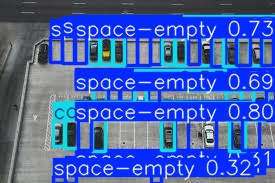

Cars detected: 38


In [32]:
from ultralytics import YOLO
from PIL import Image
import os

# Load trained model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Correct image path
image_path = "/kaggle/input/parking-image/images.jpg"

# Run prediction
results = model.predict(source=image_path, conf=0.3, save=True)

# Get saved output path
save_dir = results[0].save_dir
output_path = os.path.join(save_dir, "images.jpg")

# Display output image
display(Image.open(output_path))

print("Cars detected:", len(results[0].boxes))



image 1/1 /kaggle/input/parking-image/images.jpg: 448x640 10 space-emptys, 14 cars, 9.1ms
Speed: 2.2ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /kaggle/working/runs/detect/predict4
===== SMART PARKING REPORT =====
🚗 Cars Occupied   : 14
🅿 Empty Slots     : 10
📊 Total Slots     : 24
✅ STATUS: Parking Available


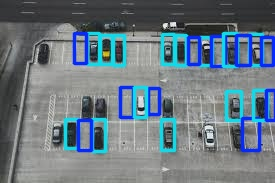

In [33]:
from ultralytics import YOLO
from PIL import Image
import os

# Load your trained model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Image path (your uploaded image)
image_path = "/kaggle/input/parking-image/images.jpg"

# Run prediction
results = model.predict(
    source=image_path,
    conf=0.4,
    save=True,
    show_labels=False,   # remove text clutter
    show_conf=False
)

# Get detections
boxes = results[0].boxes
classes = boxes.cls.tolist()

# Class IDs:
# 0 = space-empty
# 1 = car

car_count = classes.count(1)
empty_count = classes.count(0)
total_slots = car_count + empty_count

# -------------------------
# Print Clean Summary
# -------------------------
print("===== SMART PARKING REPORT =====")
print(f"🚗 Cars Occupied   : {car_count}")
print(f"🅿 Empty Slots     : {empty_count}")
print(f"📊 Total Slots     : {total_slots}")

if empty_count > 0:
    print("✅ STATUS: Parking Available")
else:
    print("❌ STATUS: Parking Full")

# -------------------------
# Display Clean Output Image
# -------------------------
save_dir = results[0].save_dir
output_path = os.path.join(save_dir, "images.jpg")

display(Image.open(output_path))



image 1/1 /kaggle/input/parking-image/images.jpg: 448x640 83 space-emptys, 25 cars, 8.8ms
Speed: 2.2ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


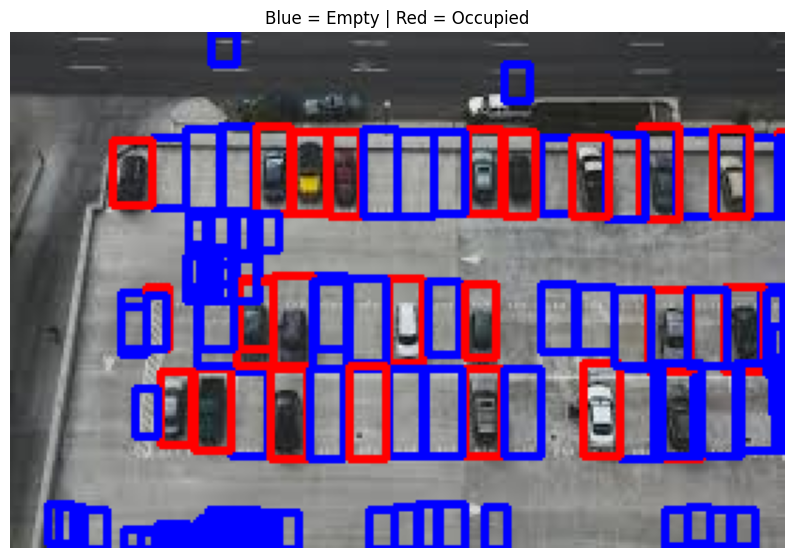

====== SMART PARKING REPORT ======
Total Slots     : 108
Empty Slots     : 83
Occupied Slots  : 25


In [40]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

image_path = "/kaggle/input/parking-image/images.jpg"

# 🔥 lower confidence
results = model.predict(source=image_path, conf=0.10)

r = results[0]

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

empty_count = 0
occupied_count = 0

for box, cls in zip(r.boxes.xyxy, r.boxes.cls):

    x1, y1, x2, y2 = map(int, box)
    class_id = int(cls)

    if class_id == 0:  # space-empty
        empty_count += 1
        color = (0, 0, 255)   # Blue
    else:  # car
        occupied_count += 1
        color = (255, 0, 0)   # Red

    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

total = empty_count + occupied_count

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis("off")
plt.title("Blue = Empty | Red = Occupied")
plt.show()

print("====== SMART PARKING REPORT ======")
print("Total Slots     :", total)
print("Empty Slots     :", empty_count)
print("Occupied Slots  :", occupied_count)



image 1/1 /kaggle/input/parking-image/images.jpg: 448x640 83 space-emptys, 25 cars, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


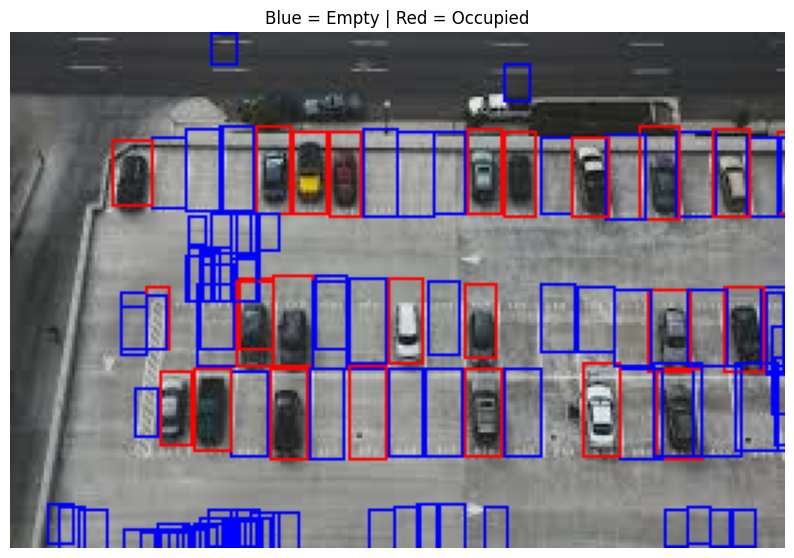

====== SMART PARKING REPORT ======
Total Slots     : 108
Empty Slots     : 83
Occupied Slots  : 25


In [41]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

image_path = "/kaggle/input/parking-image/images.jpg"

results = model.predict(source=image_path, conf=0.10)

r = results[0]

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

empty_count = 0
occupied_count = 0

for box, cls in zip(r.boxes.xyxy, r.boxes.cls):

    x1, y1, x2, y2 = map(int, box)
    class_id = int(cls)

    if class_id == 0:      # Empty
        empty_count += 1
        color = (0, 0, 255)    # Blue
    else:                  # Car
        occupied_count += 1
        color = (255, 0, 0)    # Red

    # 🔥 THIN LINE (1 instead of 3 or 5)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 1)

total = empty_count + occupied_count

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis("off")
plt.title("Blue = Empty | Red = Occupied")
plt.show()

print("====== SMART PARKING REPORT ======")
print("Total Slots     :", total)
print("Empty Slots     :", empty_count)
print("Occupied Slots  :", occupied_count)
